In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!"c:/Users/Priyanshu Bhaskar/.conda/envs/myenv/python.exe" -m pip install seaborn

import sys
print(sys.executable)
import seaborn as sns
import matplotlib.pyplot as plt



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\python.exe


In [2]:
!"c:/Users/Priyanshu Bhaskar/.conda/envs/myenv/python.exe" -m pip install pandas



In [3]:
import pandas as pd
print(pd.__version__)


1.1.5


In [4]:
import sys
!"{sys.executable}" -m pip install pandas


### EDA

In [5]:
df = pd.read_csv(r"C:\Users\Priyanshu Bhaskar\Downloads\Froad_detection\FastagFraudDetection.csv")
df.head()





,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [6]:
df.shape

(5000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [8]:
#to find is there is a null or not 
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

### Total null value is in FastagID 549 

In [9]:
df.duplicated().sum()

0

In [10]:
#describe or get the statistical description
df.describe()


,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [11]:
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/24/2023 2:55,Bus,FTG-141-BCA-345,B-102,Regular,Large,"13.042660878688794, 77.47580097259879",KA34BC0123,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


In [12]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [13]:
df['Vehicle_Type'].unique()

array(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
      dtype=object)

In [14]:
print("Unique Vehicle Type:", df['Vehicle_Type'].unique())
print("Unique TollBoothID:", df['TollBoothID'].unique())
print("Unique Lane_Type:", df['Lane_Type'].unique())
print("Unique Vehicle_Dimensions:", df['Vehicle_Dimensions'].unique())
print("Unique Fraud_indicator:", df['Fraud_indicator'].unique())
print("Unique Geographical_Location:", df['Geographical_Location'].unique())


Unique Vehicle Type: ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Unique TollBoothID: ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Unique Lane_Type: ['Express' 'Regular']
Unique Vehicle_Dimensions: ['Large' 'Small' 'Medium']
Unique Fraud_indicator: ['Fraud' 'Not Fraud']
Unique Geographical_Location: ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


# Data Visualization

In [15]:
#import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64


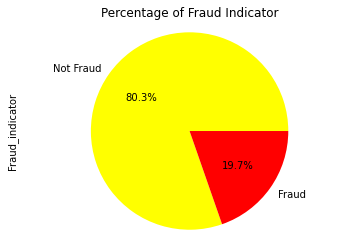

In [16]:
print(df['Fraud_indicator'].value_counts())
df['Fraud_indicator'].value_counts().plot(kind='pie',autopct = '%1.1f%%',colors = ['yellow','red'])
plt.title("Percentage of Fraud Indicator")
plt.axis('equal')
plt.show()

## Analysis of different columns
** # Based on Froud indicator# **

In [17]:
df['Vehicle_Type'].value_counts()

Bus           716
SUV           714
Sedan         714
Car           714
Truck         714
Van           714
Motorcycle    714
Name: Vehicle_Type, dtype: int64

Text(0.5, 1.0, 'Vehicle Type')

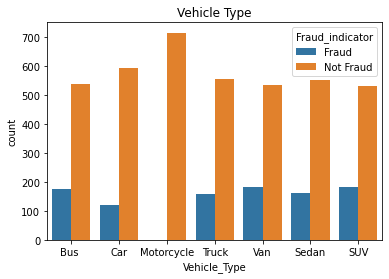

In [18]:
# Vehicle Type
sns.countplot(x='Vehicle_Type',data =df, hue='Fraud_indicator').set_title('Vehicle Type')

<AxesSubplot:xlabel='Vehicle_Dimensions', ylabel='count'>

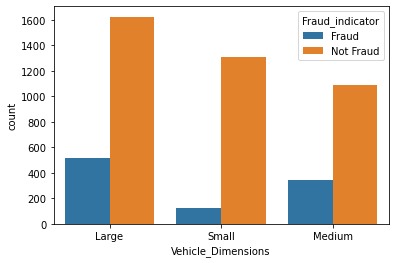

In [19]:
# Vehicle Dimensions 
sns.countplot(x='Vehicle_Dimensions',data =df, hue='Fraud_indicator')

Text(0.5, 1.0, 'Different Tollbooths')

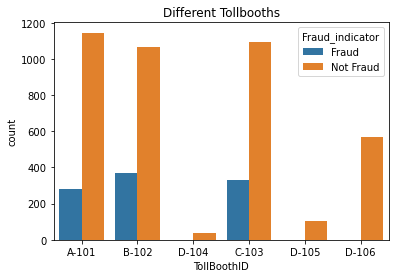

In [20]:
#TollBoothID 
sns.countplot(x='TollBoothID',data =df, 
              hue='Fraud_indicator').set_title('Different Tollbooths')

Text(0.5, 1.0, 'Different Lans')

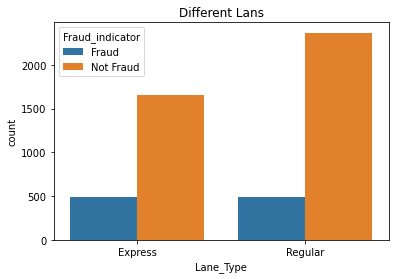

In [21]:
#Lane Type
sns.countplot(x='Lane_Type',data =df, 
              hue='Fraud_indicator').set_title('Different Lans')

Text(0.5, 1.0, 'Different Lans')

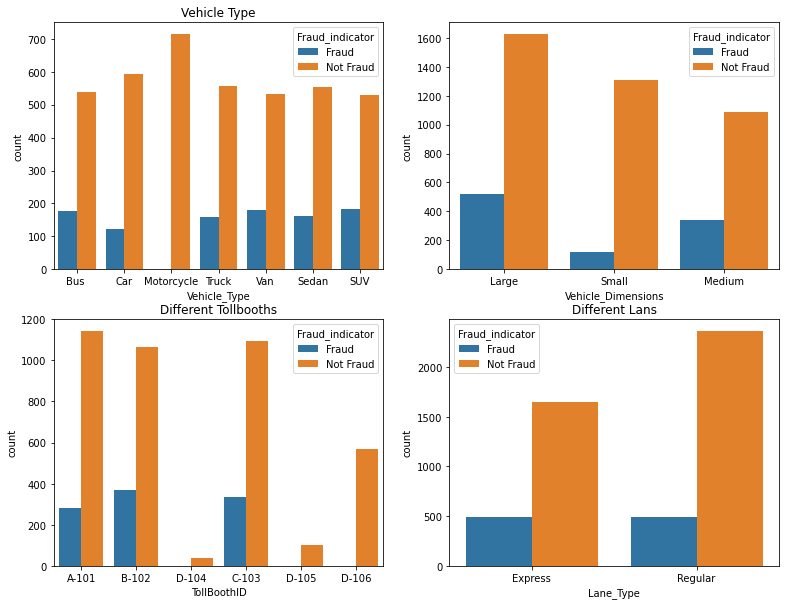

In [22]:
# combining all graphs together
fig,axes = plt.subplots(2,2, figsize=(13,10))
# Vehicle Type
sns.countplot(x='Vehicle_Type',data =df, 
              hue='Fraud_indicator',
             ax=axes[0,0]).set_title('Vehicle Type')
# Vehicle Dimensions 
sns.countplot(x='Vehicle_Dimensions',data =df, hue='Fraud_indicator',
              ax=axes[0,1]
             )
#TollBoothID 
sns.countplot(x='TollBoothID',data =df, 
              hue='Fraud_indicator',
             ax = axes[1,0]).set_title('Different Tollbooths'
                                              )
#Lane Type
sns.countplot(x='Lane_Type',data =df, 
              hue='Fraud_indicator',
             ax = axes[1,1]).set_title('Different Lans')

### Observation
1. Motorcycles are clean
2. Toll boots 104,105 & 106 are clean 101,102,103 are not
3. Expressway has a higher fraud % based on the vehicle than regular
   

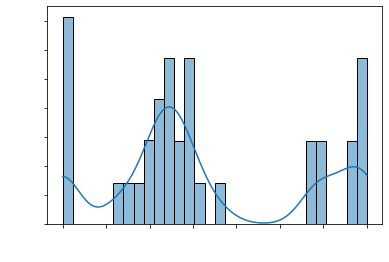

In [27]:
#distribution of transaction amount
sns.histplot(df["Transaction_Amount"],bins=30,kde = True)
#df.columns
plt.xlabel("Transaction Amount", color="white")  # X-label color
plt.ylabel("Count", color="white")              # Y-label color

# Also change tick colors if needed
plt.xticks(color="white")


plt.yticks(color="white")

plt.show()

distribution of paid amount

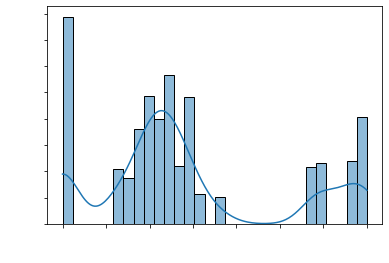

In [30]:
sns.histplot(df['Amount_paid'],bins=30,kde=True)
plt.xticks(color="white")

plt.xlabel("Amount_paid", color="white")  # X-label color
plt.ylabel("Count", color="white")              # Y-label color
plt.yticks(color="white")

plt.show()